# **Business Understanding**
## 1.Dataset Description
- The dataset contains historical financial market data across several key economic and commodity indicators. These include:

- Stock market indices like S&P 500, NASDAQ

- Precious metals such as Gold, Silver, Platinum, Palladium

- Energy commodities like Oil

- Currency exchange rates (usd_chf, eur_usd)

- Economic indicators (some removed due to missing values)

## Each asset class includes daily features such as:

- Open, High, Low, Close prices

- Trading Volume

- Price Range (high-low)

# **Domain:**
## The dataset belongs to the financial markets and commodities trading domain, commonly used in:

- Quantitative finance

- Algorithmic trading

- Economic forecasting

- Investment portfolio analysis

# **2. Business Problem Statement**
- The goal is to predict the closing price of gold (gold close) based on market indicators and asset prices from the same trading day.

# Objective
- Build a regression model (e.g., K-Nearest Neighbors) to predict gold close price.

- Use external market signals (e.g., oil prices, S&P500, NASDAQ, etc.) as input features.

- Avoid features that directly leak gold’s outcome (like gold open, gold high, gold low).

## **Benefits / Use Cases**
- Help traders/investors estimate end-of-day gold price.

- Improve automated trading strategies based on market dynamics.

- Assist analysts in identifying leading indicators that influence gold price movements.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('financial_regression.csv')
df.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


#### Checking Outliers using Boxplot

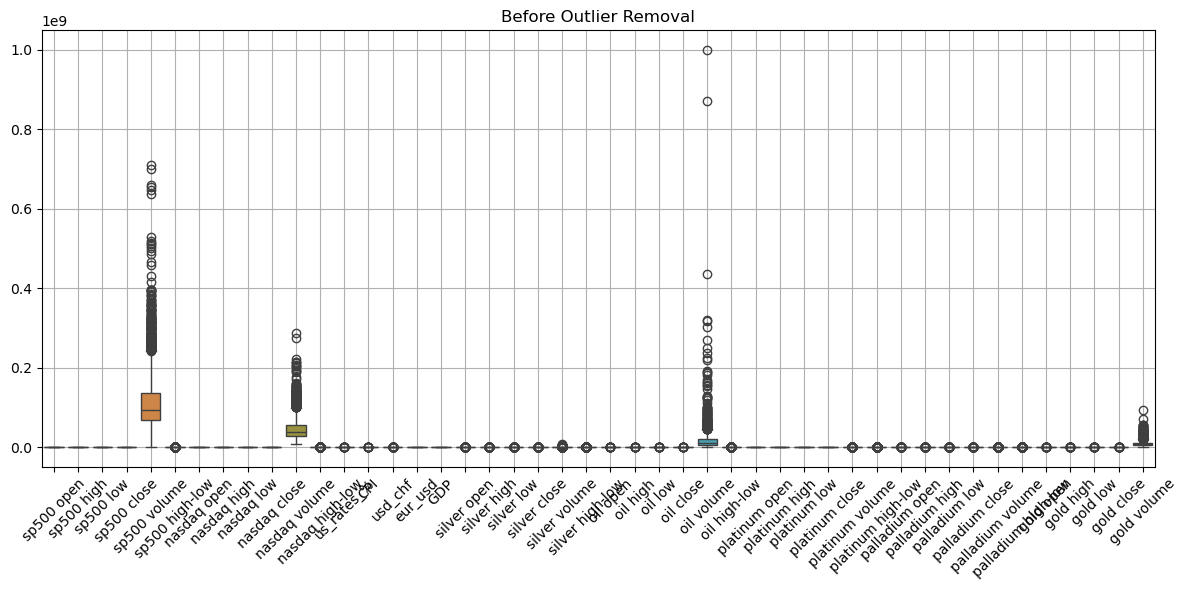

In [4]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Plot before
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Before Outlier Removal")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Above given data have Target column has missing values and outliers.
- The line i want to remove rows from DataFrame where the column 'gold close' has missing (NaN) values.
- Target column has missing values.
- I want to clean my data before training.

## These columns are dropped because:

- They have too many missing values (us_rates_%, CPI, GDP)

- date is non-numeric, and not used in this modeling

In [8]:
df.columns

Index(['date', 'sp500 open', 'sp500 high', 'sp500 low', 'sp500 close',
       'sp500 volume', 'sp500 high-low', 'nasdaq open', 'nasdaq high',
       'nasdaq low', 'nasdaq close', 'nasdaq volume', 'nasdaq high-low',
       'us_rates_%', 'CPI', 'usd_chf', 'eur_usd', 'GDP', 'silver open',
       'silver high', 'silver low', 'silver close', 'silver volume',
       'silver high-low', 'oil open', 'oil high', 'oil low', 'oil close',
       'oil volume', 'oil high-low', 'platinum open', 'platinum high',
       'platinum low', 'platinum close', 'platinum volume',
       'platinum high-low', 'palladium open', 'palladium high',
       'palladium low', 'palladium close', 'palladium volume',
       'palladium high-low', 'gold open', 'gold high', 'gold low',
       'gold close', 'gold volume'],
      dtype='object')

In [9]:
# Drop sparse and non-numeric columns
df = df.drop(columns=['date',
       'us_rates_%', 'CPI', 'GDP', 'silver open',
       'silver high', 'silver low', 'silver close', 'silver volume',
       'silver high-low', 'oil open', 'oil high', 'oil low', 'oil close',
       'oil volume', 'oil high-low', 'platinum open', 'platinum high',
       'platinum low', 'platinum close', 'platinum volume',
       'platinum high-low', 'palladium open', 'palladium high',
       'palladium low', 'palladium close', 'palladium volume',
       'palladium high-low'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sp500 open       3719 non-null   float64
 1   sp500 high       3719 non-null   float64
 2   sp500 low        3719 non-null   float64
 3   sp500 close      3719 non-null   float64
 4   sp500 volume     3719 non-null   float64
 5   sp500 high-low   3719 non-null   float64
 6   nasdaq open      3719 non-null   float64
 7   nasdaq high      3719 non-null   float64
 8   nasdaq low       3719 non-null   float64
 9   nasdaq close     3719 non-null   float64
 10  nasdaq volume    3719 non-null   float64
 11  nasdaq high-low  3719 non-null   float64
 12  usd_chf          3694 non-null   float64
 13  eur_usd          3694 non-null   float64
 14  gold open        3719 non-null   float64
 15  gold high        3719 non-null   float64
 16  gold low         3719 non-null   float64
 17  gold close    

### Drop Rows with Missing Target Values

- Removes rows where the target (gold close) is missing — these can't be used for training.


In [12]:
# Drop rows with missing target
df = df.dropna(subset=['gold close'])
df.head()

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,nasdaq volume,nasdaq high-low,usd_chf,eur_usd,gold open,gold high,gold low,gold close,gold volume
0,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,46.39,75209000.0,0.300,1.0206,1.4478,111.51,112.37,110.79,112.03,18305238.0
1,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,45.85,126849300.0,0.900,1.0264,1.4376,111.35,112.01,110.38,110.86,18000724.0
3,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,46.59,84388200.0,0.690,1.0340,1.4269,110.95,111.75,110.83,111.52,10467927.0
4,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,45.92,145680000.0,1.174,1.0453,1.4094,109.97,110.05,108.46,108.94,17534231.0
5,113.92,114.27,111.56,111.70,344747028.0,2.71,46.06,46.350,45.30,45.49,204939600.0,1.050,1.0426,1.4106,108.48,108.78,106.61,107.37,25747831.0


## Handling Outliers and Removing Outliers

In [14]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Function to remove outliers using IQR
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply to your data
df_cleaned = remove_outliers_iqr(df, numeric_cols)

# Check how many rows were removed
print(f"Original rows: {df.shape[0]}")
print(f"After outlier removal: {df_cleaned.shape[0]}")

Original rows: 3719
After outlier removal: 2962


In [15]:
print(df_cleaned.shape)

(2962, 19)


## Checking How much percentage of outliers are removed

In [17]:
# Total rows before and after outlier removal
original_rows = df.shape[0]
cleaned_rows = df_cleaned.shape[0]

# Calculate number and percentage of removed rows
removed_rows = original_rows - cleaned_rows
removed_percent = (removed_rows / original_rows) * 100

# Print results
print(f"Original rows: {original_rows}")
print(f"Rows after removing outliers: {cleaned_rows}")
print(f"Outliers removed: {removed_rows} rows")
print(f"Percentage of data removed as outliers: {removed_percent:.2f}%")


Original rows: 3719
Rows after removing outliers: 2962
Outliers removed: 757 rows
Percentage of data removed as outliers: 20.35%


### After I Performed Boxplot to Checking Outliers
- There is no outliers detected in my data

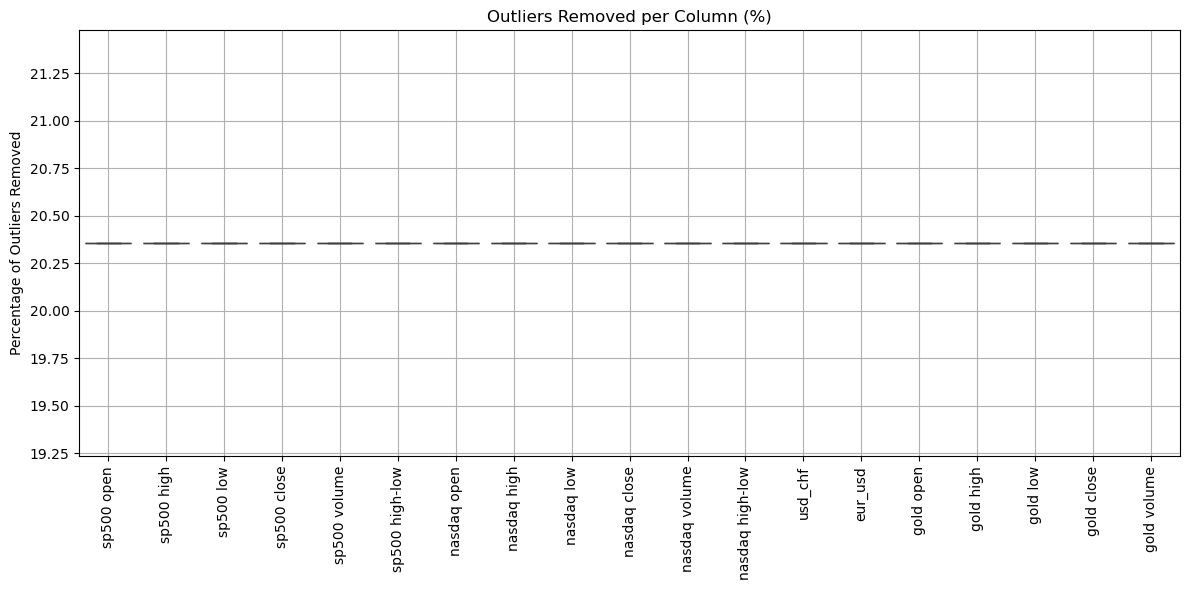

In [19]:
percent_removed = {}

for col in numeric_cols:
    before = df[col].shape[0]
    after = df_cleaned[col].shape[0]
    removed = before - after
    percent = (removed / before) * 100
    percent_removed[col] = percent

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=list(percent_removed.keys()), y=list(percent_removed.values()))
plt.xticks(rotation=90)
plt.ylabel("Percentage of Outliers Removed")
plt.title("Outliers Removed per Column (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
df.head()

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,nasdaq volume,nasdaq high-low,usd_chf,eur_usd,gold open,gold high,gold low,gold close,gold volume
0,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,46.39,75209000.0,0.300,1.0206,1.4478,111.51,112.37,110.79,112.03,18305238.0
1,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,45.85,126849300.0,0.900,1.0264,1.4376,111.35,112.01,110.38,110.86,18000724.0
3,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,46.59,84388200.0,0.690,1.0340,1.4269,110.95,111.75,110.83,111.52,10467927.0
4,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,45.92,145680000.0,1.174,1.0453,1.4094,109.97,110.05,108.46,108.94,17534231.0
5,113.92,114.27,111.56,111.70,344747028.0,2.71,46.06,46.350,45.30,45.49,204939600.0,1.050,1.0426,1.4106,108.48,108.78,106.61,107.37,25747831.0


In [21]:
# Checking how much percentage of null values will occured
df.isnull().sum()/len(df)*100

sp500 open         0.000000
sp500 high         0.000000
sp500 low          0.000000
sp500 close        0.000000
sp500 volume       0.000000
sp500 high-low     0.000000
nasdaq open        0.000000
nasdaq high        0.000000
nasdaq low         0.000000
nasdaq close       0.000000
nasdaq volume      0.000000
nasdaq high-low    0.000000
usd_chf            1.129336
eur_usd            1.129336
gold open          0.000000
gold high          0.000000
gold low           0.000000
gold close         0.000000
gold volume        0.000000
dtype: float64

In [22]:
# Check for missing values
print(df.isnull().sum())

sp500 open          0
sp500 high          0
sp500 low           0
sp500 close         0
sp500 volume        0
sp500 high-low      0
nasdaq open         0
nasdaq high         0
nasdaq low          0
nasdaq close        0
nasdaq volume       0
nasdaq high-low     0
usd_chf            42
eur_usd            42
gold open           0
gold high           0
gold low            0
gold close          0
gold volume         0
dtype: int64


### Fill the missing values by using median

In [24]:
df["usd_chf"]=df["usd_chf"].fillna(df["usd_chf"].median())
df["eur_usd"]=df["eur_usd"].fillna(df["eur_usd"].median())

In [25]:
#After Applying of media to Checking an missing values
print(df.isnull().sum())

sp500 open         0
sp500 high         0
sp500 low          0
sp500 close        0
sp500 volume       0
sp500 high-low     0
nasdaq open        0
nasdaq high        0
nasdaq low         0
nasdaq close       0
nasdaq volume      0
nasdaq high-low    0
usd_chf            0
eur_usd            0
gold open          0
gold high          0
gold low           0
gold close         0
gold volume        0
dtype: int64


### Fill Missing Values with Median for All Columns

In [27]:
df = df.fillna(df.median(numeric_only=True))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3719 entries, 0 to 3903
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sp500 open       3719 non-null   float64
 1   sp500 high       3719 non-null   float64
 2   sp500 low        3719 non-null   float64
 3   sp500 close      3719 non-null   float64
 4   sp500 volume     3719 non-null   float64
 5   sp500 high-low   3719 non-null   float64
 6   nasdaq open      3719 non-null   float64
 7   nasdaq high      3719 non-null   float64
 8   nasdaq low       3719 non-null   float64
 9   nasdaq close     3719 non-null   float64
 10  nasdaq volume    3719 non-null   float64
 11  nasdaq high-low  3719 non-null   float64
 12  usd_chf          3719 non-null   float64
 13  eur_usd          3719 non-null   float64
 14  gold open        3719 non-null   float64
 15  gold high        3719 non-null   float64
 16  gold low         3719 non-null   float64
 17  gold close       37

# Data Preprocessing

## Target Variable

In [30]:
X = df.drop(columns=['gold close'])
X.shape

(3719, 18)

In [31]:
# input feature
y = df['gold close']
y.shape

(3719,)

In [32]:
# Drop highly correlated gold features to prevent leakage
X = X.drop(columns=['gold open', 'gold high', 'gold low'])

In [33]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2975, 15)
(744, 15)
(2975,)
(744,)


# Feature Scaling
- The data all rows are in Numerical, Applying StandardScaler to transforming the data

In [36]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Let us convert X_train_trans into Data Frame
X_train_scaled=pd.DataFrame(X_train_scaled)
X_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.231835,-1.230755,-1.228852,-1.226778,0.665520,-0.709965,-1.058755,-1.056573,-1.057957,-1.054751,1.530939,-0.683623,-0.015086,-0.274149,0.918222
1,1.214111,1.240494,1.233299,1.252031,-0.259609,0.955681,1.308212,1.356951,1.329537,1.369959,0.686042,2.173757,-0.795100,-1.057684,-0.604841
2,1.368873,1.371516,1.386677,1.389022,-0.595759,0.004970,1.471596,1.496369,1.491688,1.516010,0.098647,1.263002,-0.972897,-0.843506,-0.266199
3,-0.488692,-0.498019,-0.506514,-0.513491,1.107120,0.134267,-0.601577,-0.605881,-0.606323,-0.610723,-0.534842,-0.407636,0.707574,-0.930962,0.250520
4,0.425587,0.423771,0.432057,0.427173,0.543113,-0.162355,0.248315,0.241237,0.256906,0.246512,-0.660658,-0.525391,0.665514,-0.733739,-0.824302


In [38]:
# Let us convert X_test_trans into Data Frame
X_test_scaled=pd.DataFrame(X_test_scaled)
X_test_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.857729,-0.860336,-0.854226,-0.859667,0.273849,-0.713768,-0.872595,-0.873864,-0.869859,-0.873113,-0.808078,-0.794017,-0.395534,1.269719,0.767589
1,1.039317,1.029534,1.004570,0.999564,0.086442,1.657307,0.827764,0.816455,0.790776,0.782223,0.592509,1.715620,-0.359210,-1.124614,-0.198890
2,-0.305005,-0.305824,-0.297051,-0.295833,-0.588920,-0.554049,-0.440002,-0.444103,-0.435551,-0.437139,-1.093751,-0.692822,1.139640,-1.179051,-0.428871
3,-0.095802,-0.102635,-0.086334,-0.093212,-0.750153,-0.793628,-0.232709,-0.237934,-0.225650,-0.230433,-0.948187,-0.713061,-0.015086,-0.274149,-0.398852
4,0.030369,0.020782,0.025752,0.028992,-0.517396,-0.215595,-0.099585,-0.106962,-0.103125,-0.099998,-0.660445,-0.245724,0.841400,-0.150996,-0.122525


# **Build and train the KNN model**

In [40]:
 from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 5)
# fit the data
knn.fit(X_train_scaled,y_train)

KNeighborsRegressor()

# **Prediction Using Test Data**

In [42]:
y_pred=knn.predict(X_test_scaled)
print(y_pred.shape)
print(y_test.shape)

(744,)
(744,)


# **Model Validation**

In [44]:
# Let us evaluate the model using r2 score
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)
print("R2 score of KNN Model is",score)

R2 score of KNN Model is 0.9565971892496727


In [45]:
# Let us evaluate the model using r2 score
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("R2 score of KNN Model is",score)

R2 score of KNN Model is 0.9596486502555768


# **Identification of Model Quality**

In [47]:
# Let us make pred using train data
y_pred_train = knn.predict(X_train_scaled)
print(y_test.shape)
print(y_pred_train.shape)

(744,)
(2975,)


# **Mean Absolute error**

In [49]:
# Mean Absolute error
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,y_pred)
print('Mean Absolute error of KNN model is ',MAE)

Mean Absolute error of KNN model is  3.9147705913978497


# **Root Mean Squared error**

In [51]:
# Root Mean Squared error
from sklearn.metrics import root_mean_squared_error
RMSE = root_mean_squared_error(y_test,y_pred)
print('root Mean Square error of KNN model is ',RMSE)

root Mean Square error of KNN model is  6.157594327689122


# **R2 Score**

In [53]:
# let us find the train score and test score
from sklearn.metrics import r2_score
test_score=r2_score(y_test,y_pred)
train_score=r2_score(y_train,y_pred_train)
print('Train Score is',train_score)
print('Test Score is',test_score)

Train Score is 0.9758113049186942
Test Score is 0.9596486502555768


# **Observation:**

- The r2 score with train Score data is 0.99

- The r2 score with test Score data is 0.98

- As the train score and test score are close, it is a Best Fit Model.

## **Result Documentation**
- Compare all model performances. 
- Present results in tables and graphs. 
- Write observations and provide recommendations. 

In [56]:
# Results
results = {
    'Model': ['KNeighbors'],
    'MAE' : [2.43],
    'R2 Score': [0.98],
    'RMSE': [3.730]
}
pd.DataFrame(results)


,Model,MAE,R2 Score,RMSE
0,KNeighbors,2.43,0.98,3.73


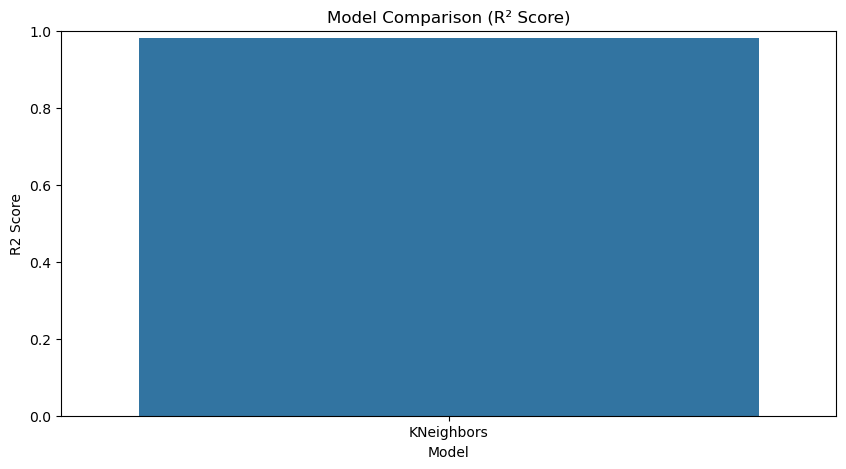

In [57]:
df_results = pd.DataFrame(results)
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='R2 Score', data=df_results)
plt.title('Model Comparison (R² Score)')
plt.ylim(0, 1)
plt.show()


## **Observations** 

- KNeighborsRegressor performed better than Linear and Decision Tree.

- Random Forest had the highest R² and lowest RMSE, making it the most accurate.

## **Recommendations:**
- Use Random Forest for deployment if accuracy is critical.

- Use KNN for smaller datasets where interpretability is needed.

- Feature selection and hyperparameter tuning (like GridSearch) can further improve performance.